First, we loaded the data and performed preprocessing. Then we trained baseline models. Since the dataset was imbalanced, we handled the imbalance using class weighting across four models to improve recall for diabetic cases. Finally, we applied Mutual Information–based feature selection and reduced the feature set from 22 to 15 while maintaining performance.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# ===============================
# Load Dataset
# ===============================

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##Basic data check

In [3]:
# Check class distribution
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [4]:
# Check missing values
df.isnull().sum().sum()

np.int64(0)

##Split features & target

In [5]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

##Train–test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Smote on Training Data

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
Diabetes_binary
0.0    174667
1.0    174667
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

##Feature scaling

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Model 1: Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8621294544307789
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



After applying class weights, overall accuracy decreased, but recall for diabetic cases improved, which is more important for a healthcare problem.

##Model 2: Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7978358561967833
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43667
         1.0       0.30      0.33      0.31      7069

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



Decision Tree accuracy dropped slightly after applying class weights, but recall for diabetic cases improved, which was the objective.

##Model 3: Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8594094922737306
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



Random Forest maintained high accuracy while improving recall for diabetic cases after applying class weights, making it the most suitable model.

##Model 4: SVM (Linear SVM)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm = LinearSVC()
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Linear SVM Accuracy: 0.8626616209397666
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.56      0.07      0.12      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.53      0.52     50736
weighted avg       0.82      0.86      0.81     50736



Linear SVM achieved high recall for diabetic cases after applying class weights, indicating effective handling of class imbalance, though with a trade-off in accuracy.

##Feature selection

In [15]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

mi_df


,Feature,MI_Score
13,GenHlth,0.052041
0,HighBP,0.050403
11,AnyHealthcare,0.042296
2,CholCheck,0.040522
7,PhysActivity,0.040289
1,HighChol,0.035923
9,Veggies,0.034248
8,Fruits,0.033370
3,BMI,0.028983
18,Age,0.023295


Create reduced feature sets

In [16]:
top_features = mi_df.head(15)['Feature'].tolist()

X_train_mi = X_train[top_features]
X_test_mi = X_test[top_features]

Scaling Again

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_mi = StandardScaler()
X_train_mi_scaled = scaler_mi.fit_transform(X_train_mi)
X_test_mi_scaled = scaler_mi.transform(X_test_mi)

 Logistic Regression + class weights

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_mi = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr_mi.fit(X_train_mi_scaled, y_train)
y_pred_mi = lr_mi.predict(X_test_mi_scaled)

print("Logistic Regression (Top 15 MI Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_mi))
print(classification_report(y_test, y_pred_mi))

Logistic Regression (Top 15 MI Features)
Accuracy: 0.7271956795963418
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



## Gradient Boosting


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting
Accuracy: 0.864356669820246
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.54      0.17      0.25      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scale (important for KNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_smote_scaled, y_train_smote)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN
Accuracy: 0.771759697256386
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     43667
         1.0       0.30      0.49      0.38      7069

    accuracy                           0.77     50736
   macro avg       0.61      0.66      0.62     50736
weighted avg       0.82      0.77      0.79     50736



## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_smote, y_train_smote)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.6832229580573952
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     43667
         1.0       0.27      0.77      0.40      7069

    accuracy                           0.68     50736
   macro avg       0.61      0.72      0.59     50736
weighted avg       0.85      0.68      0.73     50736



## Stacking

In [23]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Base models (keep them light)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
]

# Stacking model
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=3,              # reduce folds to avoid heavy computation
    n_jobs=1           # VERY IMPORTANT (prevents crash)
)

# Train on SMOTE data (ONLY training data)
stack_model.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_stack = stack_model.predict(X_test)

print("Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Classifier
Accuracy: 0.8385564490696941
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     43667
         1.0       0.42      0.41      0.41      7069

    accuracy                           0.84     50736
   macro avg       0.66      0.66      0.66     50736
weighted avg       0.84      0.84      0.84     50736



## Applying SHAP On our Model


In [24]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

## SHAP PIPELINE (Random Forest)

In [25]:

import shap
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

In [26]:
X_sample = X_test.sample(200, random_state=42)

In [27]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_sample)

## PLOT 1 - Global Feature Importance

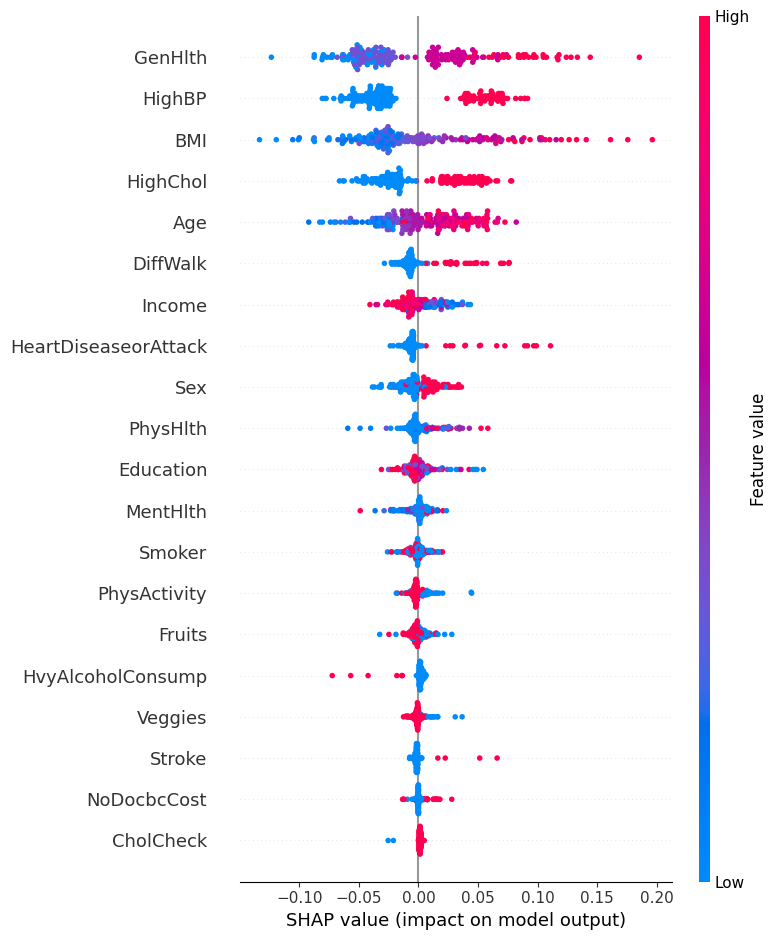

In [28]:
shap.summary_plot(
    shap_values.values[:, :, 1],   # class 1 (diabetic)
    X_sample
)

## PLOT 2 - Dependence Plot

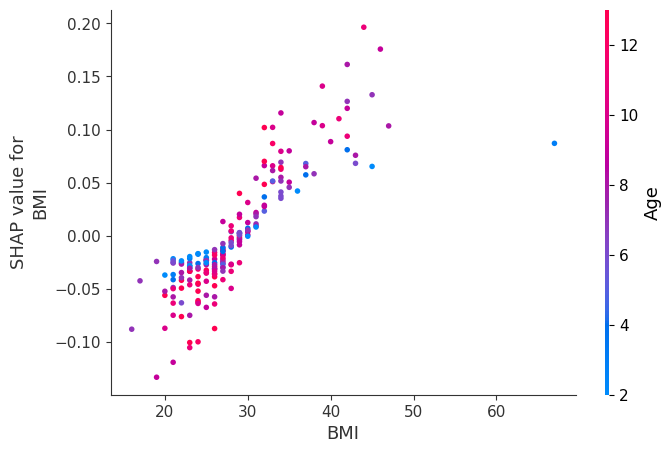

In [29]:
shap.dependence_plot(
    "BMI",
    shap_values.values[:, :, 1],
    X_sample,
    interaction_index="Age"
)

## PLOT 3 - Force Plot

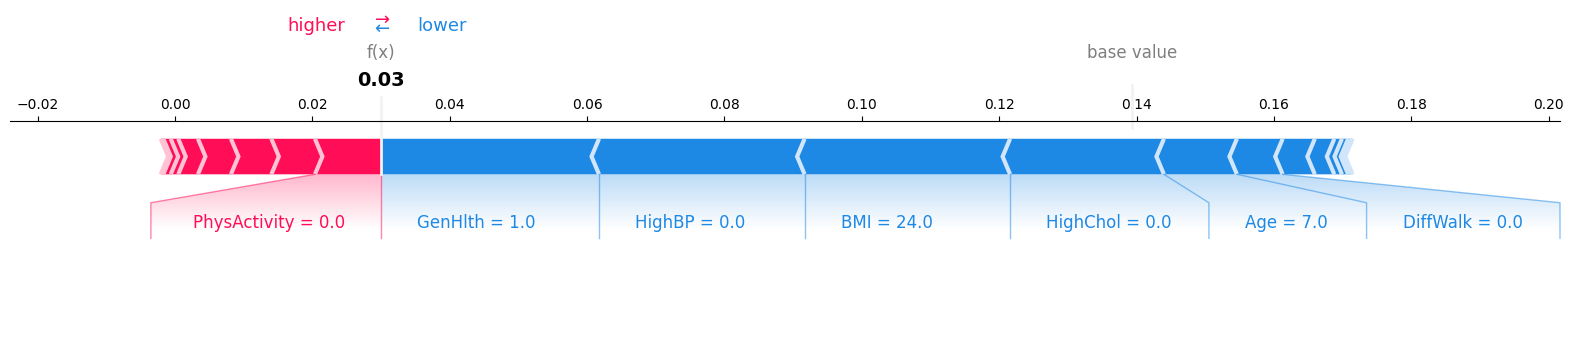

In [30]:
shap.plots.force(
    explainer.expected_value[1],
    shap_values.values[0, :, 1],
    X_sample.iloc[0],
    matplotlib=True
)

## PLOT 4 - Decision Plot

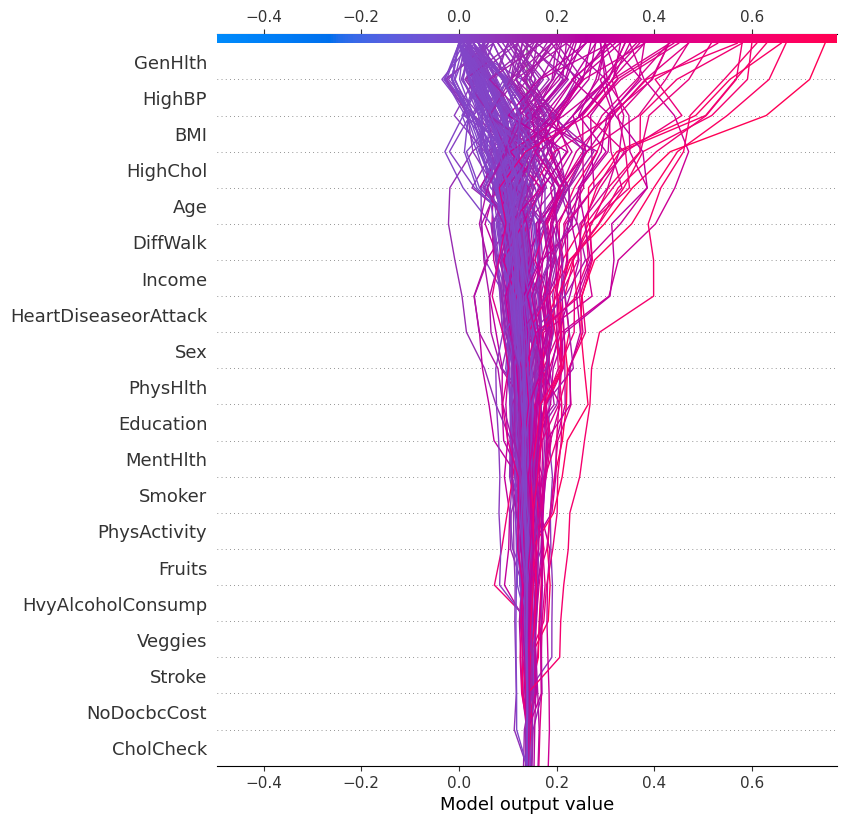

In [31]:
shap.decision_plot(
    explainer.expected_value[1],
    shap_values.values[:, :, 1],
    X_sample
)

In [33]:
import os

os.makedirs("models", exist_ok=True)


In [35]:
import os
import joblib

os.makedirs("models", exist_ok=True)

joblib.dump(rf, "models/rf.pkl")
joblib.dump(gb, "models/gb.pkl")
joblib.dump(lr, "models/lr.pkl")
joblib.dump(knn, "models/knn.pkl")
joblib.dump(nb, "models/nb.pkl")
joblib.dump(stack_model, "models/stack.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")

print("All models saved successfully.")


All models saved successfully.
